**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [ ]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [ ]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [ ]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [ ]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [2]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [3]:
#Step 1: Simulation of the error terms.
#We set the seed to 42 to ensure reproducibility of the random numbers.
np.random.seed(42) 
#Now, we generate an array of numbers from a normal distribution with mean 0 and standard deviation par.sigma, which is 2.
#The shape of the array is par.J, par.K, which means that the array of numbers has 3 rows and 10000 columns: one for each
#career track and one for each simulation.
array_numbers = np.random.normal(0, par.sigma, (par.J, par.K))

In [4]:
#Step 2: Calculating the expected utility.
#We start by creating an array that stores the expected utility for each career track.
#The array is initialized with zeros and has a length of the array par.J.
expected_utility = np.zeros(par.J)

#Now we loop through each career track to calculate the expected utility.
for j in range(par.J):
    #We calculate the expected utility for career choice j.
    #par.v[j] is the utility value for career choice j.
    #np.mean(array_numbers[j, :]) calculates the mean of the error terms for career choice j across all simulations.
    expected_utility[j] = par.v[j] + np.mean(array_numbers[j, :])

In [5]:
#Step 3: Calculating the average realized utility.
#We create an array of utility values for each career choice.
#We reshape par.v from a 1D array into a 2D array (3, 1) so we can add the array_numbers array by matching the dimensions correctly.
#Each utility value (1, 2, or 3) is added to the corresponding error terms across all simulations.
realized_utility = par.v.reshape((par.J, 1)) + array_numbers
#We now calculate the average realized utility. np.mean(realized_utility, axis=1) calculates the mean of realized_utility across 
#all 10000 simulations for each career choice..
average_realized_utility = np.mean(realized_utility, axis=1)

In [6]:
#Step 4: Displaying the results.
for j in range(par.J):
    print(f"Career choice {j+1}:")
    print(f"  Expected Utility: {expected_utility[j]:.3f}")
    print(f"  Average Realized Utility: {average_realized_utility[j]:.3f}")

Career choice 1:
  Expected Utility: 0.996
  Average Realized Utility: 0.996
Career choice 2:
  Expected Utility: 2.027
  Average Realized Utility: 2.027
Career choice 3:
  Expected Utility: 2.975
  Average Realized Utility: 2.975


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

Share of Graduates Choosing Each Career:
Chosen Career       1       2       3
Graduate                             
1              0.1506  0.3009  0.5485
2              0.0962  0.2746  0.6292
3              0.0677  0.2451  0.6872
4              0.0478  0.2232  0.7290
5              0.0329  0.1970  0.7701
6              0.0246  0.1883  0.7871
7              0.0169  0.1705  0.8126
8              0.0138  0.1538  0.8324
9              0.0099  0.1472  0.8429
10             0.0088  0.1376  0.8536

Average Subjective Expected Utility:
Graduate
1     3.916765
2     3.476096
3     3.336118
4     3.235321
5     3.172033
6     3.139282
7     3.105329
8     3.089818
9     3.066925
10    3.056166
Name: Prior Expected Utility, dtype: float64

Average Ex Post Realized Utility:
Graduate
1     2.455174
2     2.523703
3     2.623042
4     2.704575
5     2.754498
6     2.745181
7     2.845156
8     2.859079
9     2.820646
10    2.856297
Name: Realized Utility, dtype: float64


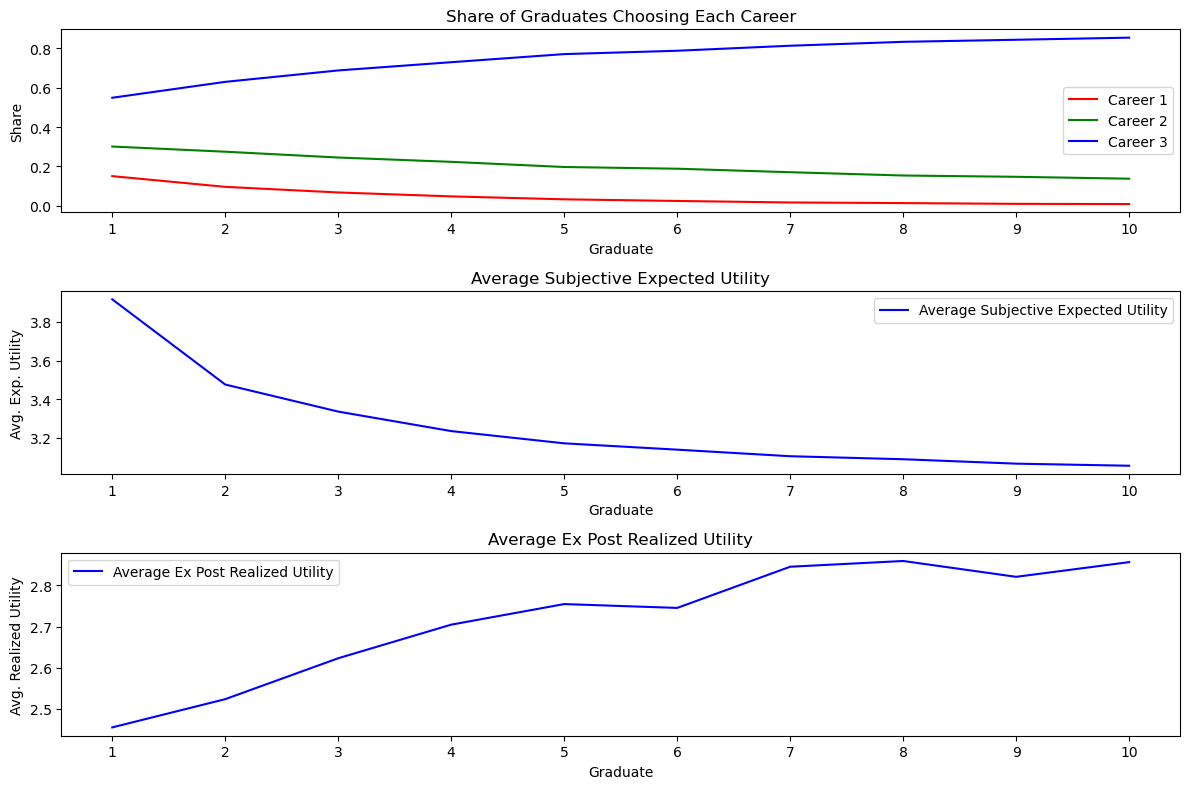

In [7]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000
par.sigma = 2
par.v = np.array([1, 2, 3])
par.c = 1

# Display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Simulation function
def simulate_career_choices(seed=7):
    np.random.seed(seed)
    results = []
    
    for k in range(par.K):
        epsilon_friends = {i: np.random.normal(0, par.sigma, (i, par.J)) for i in range(1, par.N + 1)}
        epsilon_personal = {i: np.random.normal(0, par.sigma, par.J) for i in range(1, par.N + 1)}
        
        for i in range(1, par.N + 1):
            # Calculate prior expected utilities
            prior_expected_utilities = par.v + np.mean(epsilon_friends[i], axis=0)
            
            # Determine the career choice with the highest expected utility
            chosen_career = np.argmax(prior_expected_utilities) + 1
            
            # Calculate the realized utility
            realized_utility = par.v[chosen_career - 1] + epsilon_personal[i][chosen_career - 1]
            
            results.append({
                'Graduate': i,
                'Chosen Career': chosen_career,
                'Prior Expected Utility': prior_expected_utilities[chosen_career - 1],
                'Realized Utility': realized_utility
            })
    
    return pd.DataFrame(results)

# Perform the simulation
results_df = simulate_career_choices()

# Calculate the required statistics
share_graduates_choosing_career = results_df.groupby('Graduate')['Chosen Career'].value_counts(normalize=True).unstack(fill_value=0)
average_subjective_expected_utility = results_df.groupby('Graduate')['Prior Expected Utility'].mean()
average_ex_post_realized_utility = results_df.groupby('Graduate')['Realized Utility'].mean()

# Display the results
print("Share of Graduates Choosing Each Career:")
print(share_graduates_choosing_career)
print("\nAverage Subjective Expected Utility:")
print(average_subjective_expected_utility)
print("\nAverage Ex Post Realized Utility:")
print(average_ex_post_realized_utility)

# Visualize the results
plt.figure(figsize=(12, 8))

# Share of Graduates Choosing Each Career
plt.subplot(3, 1, 1)
colors = ['red', 'green', 'blue']
for idx, career in enumerate(range(1, par.J + 1)):
    plt.plot(share_graduates_choosing_career.index, share_graduates_choosing_career[career], label=f'Career {career}', color=colors[idx])
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate')
plt.ylabel('Share')
plt.xticks(np.arange(1, par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()

# Average Subjective Expected Utility
plt.subplot(3, 1, 2)
plt.plot(average_subjective_expected_utility.index, average_subjective_expected_utility, label='Average Subjective Expected Utility', color='blue')
plt.title('Average Subjective Expected Utility')
plt.xlabel('Graduate')
plt.ylabel('Avg. Exp. Utility')
plt.xticks(np.arange(1, par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()

# Average Ex Post Realized Utility
plt.subplot(3, 1, 3)
plt.plot(average_ex_post_realized_utility.index, average_ex_post_realized_utility, label='Average Ex Post Realized Utility', color='blue')
plt.title('Average Ex Post Realized Utility')
plt.xlabel('Graduate')
plt.ylabel('Avg. Realized Utility')
plt.xticks(np.arange(1, par.N + 1))  # Ensure all graduates are displayed on x-axis
plt.legend()

plt.tight_layout()
plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [ ]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# write your answer here